In [99]:
import pandas as pd
import numpy as np

In [100]:
#this is airbnb data that was loaded from insideairbnb.com 
data=pd.read_csv('detailed listing amended.csv', encoding = "ISO-8859-1", low_memory=False)
data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,...,10.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,...,9.0,9.0,9.0,t,f,moderate,t,t,1,1.45
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is located within walking distan...,Guests have exclusive and private access to th...,We don't always get to meet all our guests in ...,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,17,0.14
3,15246,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood â it is quiet,...",A simple self service breakfast is available â...,Public transport is super convenient with a ch...,You are welcome to make yourself at home in th...,Guest's privacy will be respected at all times...,...,10.0,9.0,9.0,f,f,moderate,f,f,3,0.30
4,16760,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,NaN,NaN,NaN,...,10.0,9.0,9.0,f,f,moderate,f,f,1,0.73


In [101]:
# only keeping the columns that we want
data =data[['id',
            'name',
            'summary',
            'space',
            'description',
            'neighborhood_overview',
            'notes',
            'transit',
            'access',
            'interaction',
            'house_rules',
            'host_id',
            'host_name',
            'host_since',
            'host_about',
            'host_response_time',
            'host_response_rate',
            'host_is_superhost',
            'host_listings_count',
            'host_total_listings_count',
            'host_has_profile_pic',
            'host_identity_verified',
            'street',
            'neighbourhood',
            'neighbourhood_cleansed',
            'city',
            'state',
            'zipcode',
            'market',
            'smart_location',
            'latitude',
            'longitude',
            'is_location_exact',
            'property_type',
            'room_type',
            'accommodates',
            'bathrooms',
            'bedrooms',
            'beds',
            'bed_type',
            'amenities',
            'square_feet',
            'price',
            'weekly_price',
            'monthly_price',
            'security_deposit',
            'cleaning_fee',
            'guests_included',
            'extra_people',
            'minimum_nights',
            'maximum_nights',
            'calendar_updated',
            'has_availability',
            'availability_30',
            'availability_60',
            'availability_90',
            'availability_365',
            'number_of_reviews',
            'first_review',
            'last_review',
            'review_scores_rating',
            'review_scores_accuracy',
            'review_scores_cleanliness',
            'review_scores_checkin',
            'review_scores_communication',
            'review_scores_location',
            'review_scores_value',
            'instant_bookable',
            'cancellation_policy',
            'require_guest_profile_picture',
            'require_guest_phone_verification',
            'calculated_host_listings_count',
            'reviews_per_month']]

In [102]:
#converting first_review, last_review and calendar_last_scraped from string to date
data['first_review']=pd.to_datetime(data['first_review'])
data['last_review']=pd.to_datetime(data['last_review'])
data['host_since']=pd.to_datetime(data['host_since'])
print(data.dtypes)

id                                           int64
name                                        object
summary                                     object
space                                       object
description                                 object
neighborhood_overview                       object
notes                                       object
transit                                     object
access                                      object
interaction                                 object
house_rules                                 object
host_id                                      int64
host_name                                   object
host_since                          datetime64[ns]
host_about                                  object
host_response_time                          object
host_response_rate                         float64
host_is_superhost                           object
host_listings_count                        float64
host_total_listings_count      

In [103]:
#cleaning up the city data
data['city']=data['city'].astype(str).str.partition(',')
data['city']=data['city'].astype(str).str.partition('.')
data['city']=data['city'].astype(str).str.partition('-')
data['city']=data['city'].astype(str).str.title()
data['city']=data['city'].astype(str).str.partition('(')
data['city']=data['city'].astype(str).str.partition('/')
data['city']=data['city'].astype(str).str.rstrip() 
data['city']=data['city'].astype(str).str.lstrip()

#removing any data that doesn't characters or numbers
data=data[data['name'].astype(str).str.contains('[a-zA-Z0-9_-]+$')] 

#removing data in city column that doesn't have characters or numbers
data=data[data['city'].astype(str).str.contains('[a-zA-Z0-9_-]+$')] 

#cleaning up city data to their correct categories
data['city']=data['city'].replace('Brunswick / Melbourne', 'Brunswick')
data['city']=data['city'].replace('Dockland', 'Docklands')
data['city']=data['city'].replace('Doncaster Vic 3108', 'Doncaster')
data['city']=data['city'].replace('Doncasterï¼Melbourne', 'Doncaster')
data['city']=data['city'].replace('East St', 'St Kilda East')
data['city']=data['city'].replace('Saint Kilda', 'St Kilda')
data['city']=data['city'].replace('Saint Kilda East', 'St Kilda East')
data['city']=data['city'].replace('Saint Kilda West', 'St Kilda West')
data['city']=data['city'].replace('St Kilda West Melbourne', 'St Kilda West')
data['city']=data['city'].replace('St', 'St Kilda')
data['city']=data['city'].replace('Melborne', 'Melbourne')
data['city']=data['city'].replace('Melbourne Cbd', 'Melbourne')
data['city']=data['city'].replace('Melbourne City', 'Melbourne')
data['city']=data['city'].replace('Melbourne Vic 3000', 'Melbourne')
data['city']=data['city'].replace('Melbourne Vic 3004', 'Melbourne')
data['city']=data['city'].replace('Melbourne Victoria', 'Melbourne')
data['city']=data['city'].replace('Mlebourne', 'Melbourne')
data['city']=data['city'].replace('Praharan', 'Prahran')
data['city']=data['city'].replace('Somerton Vic 3062', 'Somerton')
data['city']=data['city'].replace('South Yarra Vic 3141', 'South Yarra')
data['city']=data['city'].replace('Southbank Melbourne', 'Southbank')
data['city']=data['city'].replace('Strthtulloch', 'Strathtulloh')
data['city']=data['city'].replace('Wantirna South Vic 3152', 'Wantirna South')
data['city']=data['city'].replace('Wheelers Hill Vic 3150', 'Wheelers Hill')
data['city']=data['city'].replace('Balaclava Vic 3183', 'Balaclava')
data['city']=data['city'].replace('Armadale North', 'Armadale')
data['city']=data['city'].replace('Blackburn Vic 3130', 'Blackburn')
data['city']=data['city'].replace('Dandenong Ranges', 'Dandenong')
data['city']=data['city'].replace('East Brunswick', 'Blackburn')
data['city']=data['city'].replace('Blackburn Vic 3130', 'Brunswick East')
data['city']=data['city'].replace('East Doncaster', 'Doncaster East')
data['city']=data['city'].replace('East St Kilda', 'St Kilda East')
data['city']=data['city'].replace('Mckinnon', 'McKinnon')
data['city']=data['city'].replace('Mt Dandenong', 'Mount Dandenong')
data['city']=data['city'].replace('Mt Waverley', 'Mount Waverley')
data['city']=data['city'].replace('North Fitzroy', 'Fitzroy')
data['city']=data['city'].replace('Northcote South', 'Northcote')
data['city']=data['city'].replace('Saint Albans', 'St Albans')
data['city']=data['city'].replace('Saint Helena', 'St Helena')
data['city']=data['city'].replace('South Wharf', 'Southbank')
data['city']=data['city'].replace('Stkilda East', 'St Kilda East')
data['city']=data['city'].replace('Victoria', 'Melbourne')

#grouping the city data
data['id'].groupby(data['city']).count().sort_values(ascending=False)

city
Melbourne               3423
Southbank                968
St Kilda                 825
South Yarra              735
Docklands                496
Richmond                 449
Carlton                  429
Brunswick                367
Fitzroy                  304
North Melbourne          280
Elwood                   265
South Melbourne          240
Northcote                238
Collingwood              236
Port Melbourne           227
Abbotsford               222
Prahran                  211
Fitzroy North            205
West Melbourne           200
East Melbourne           168
St Kilda East            166
Brunswick East           152
Windsor                  151
Point Cook               147
Hawthorn                 145
Footscray                141
Healesville              127
Preston                  116
Box Hill                 114
Glen Waverley            112
                        ... 
Preston West               1
Powelltown                 1
Cardinia Shire             1
Cardinia 

In [104]:
#dropping any unidentifiable cities
data['city'].dropna()

0               Bulleen
1        Brunswick East
2              St Kilda
3             Thornbury
4         St Kilda East
5               Berwick
6             Reservoir
7        East Melbourne
9             Frankston
10             Richmond
11             St Kilda
12            Melbourne
13            Melbourne
14            Melbourne
15        Brighton East
16             Richmond
17                  Kew
18              Fitzroy
19              Hampton
20            Thornbury
21         Clifton Hill
22            Frankston
23           Mordialloc
26            Melbourne
27            Northcote
28       Port Melbourne
31              Prahran
32             Richmond
33        St Kilda East
34            Melbourne
              ...      
21989            Altona
21990            Elwood
21991           Carlton
21992         Doncaster
21993         Docklands
21994     Oakleigh East
21997        Aberfeldie
21999    Bentleigh East
22000          St Kilda
22004         Melbourne
22005           

In [105]:
#loading in the second spreadsheet. This list was scrapped from melbourne housing that contains the city names and median prices
prices = pd.read_csv('house prices web scaping.csv')
prices.head()

,rank,city,distance,distance_in_km,cardinal_direction,median_prices
0,1,Melbourne,0.1km,0.1,North,680100.0
1,2,Southbank,1km,1.0,South,802600.0
2,3,Docklands,1.1km,1.1,South-west,1294400.0
3,4,West Melbourne,1.2km,1.2,West,1223700.0
4,5,East Melbourne,1.8km,1.8,East,3005100.0


In [106]:
#merging both the main spreadsheet and median house prices 
new_data = pd.merge(data, prices, how='left', on=['city'])

#dropping any NaNs after joining both spreadsheets
new_data.dropna()

new_data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,rank,distance,distance_in_km,cardinal_direction,median_prices
0,9835,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,...,strict_14_with_grace_period,f,f,1,0.04,119.0,12.5km,12.5,East,1259700.0
1,10803,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,...,moderate,t,t,1,1.45,26.0,4.7km,4.7,North,1133400.0
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is located within walking distan...,Guests have exclusive and private access to th...,We don't always get to meet all our guests in ...,...,strict_14_with_grace_period,f,f,17,0.14,42.0,6.1km,6.1,South,1689800.0
3,15246,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood â it is quiet,...",A simple self service breakfast is available â...,Public transport is super convenient with a ch...,You are welcome to make yourself at home in th...,Guest's privacy will be respected at all times...,...,moderate,f,f,3,0.30,51.0,6.9km,6.9,North-east,1128600.0
4,16760,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,NaN,NaN,NaN,...,moderate,f,f,1,0.73,50.0,6.7km,6.7,South-east,1318500.0


In [107]:
#placing all the city data into specific bins to identify the distance between each city and the CBD

bins = [0, 10, 20, 30, 50, 100]
names = ['within 10 km from CBD', '10 to 20 km from CBD', '20 to 30km from CBD', '30 to 50km from CBD', 'more than 50km from CBD']

new_data['distance_bins'] = pd.cut(new_data['distance_in_km'], bins, labels=names)
new_data['id'].groupby(new_data['distance_bins']).count().sort_values(ascending=False)


distance_bins
within 10 km from CBD      13726
10 to 20 km from CBD        2411
20 to 30km from CBD          952
30 to 50km from CBD          863
more than 50km from CBD      277
Name: id, dtype: int64

In [108]:
# Melbourne has a rule of thump that the rental income is 6% of the purchase price. 
# As such, I've used 6% of the median purchase price

new_data['annual_rental']=new_data['median_prices']*6/100
new_data['daily_rental']=new_data['annual_rental']/365

In [109]:
#grouping by distance grouped with the price

new_data['price'].groupby(new_data['distance_bins']).describe()

#average prices increases after 30km from the CBD

,count,mean,std,min,25%,50%,75%,max
distance_bins,,,,,,,,
within 10 km from CBD,13726.0,151.372432,189.348268,0.0,79.0,120.0,165.0,9000.0
10 to 20 km from CBD,2411.0,130.845292,299.169715,0.0,50.0,81.0,150.0,12625.0
20 to 30km from CBD,952.0,114.108193,156.086194,15.0,44.0,74.0,140.0,3400.0
30 to 50km from CBD,863.0,202.889919,467.911101,18.0,81.0,140.0,233.5,12499.0
more than 50km from CBD,277.0,220.086643,159.738667,0.0,129.0,181.0,270.0,1499.0


In [110]:
# based on the distance bins, there is a minor increase if the host is a super host for any listing less than 20km from the CBD
# whereas any listing more than 20km, there is a slight increase for listing more than 20km

new_data['price'].groupby([new_data['distance_bins'], new_data['host_is_superhost']]).mean()


distance_bins            host_is_superhost
within 10 km from CBD    f                    148.385656
                         t                    160.567200
10 to 20 km from CBD     f                    129.367677
                         t                    137.633411
20 to 30km from CBD      f                    114.950066
                         t                    110.973684
30 to 50km from CBD      f                    216.571174
                         t                    177.345515
more than 50km from CBD  f                    242.564885
                         t                    199.917808
Name: price, dtype: float64

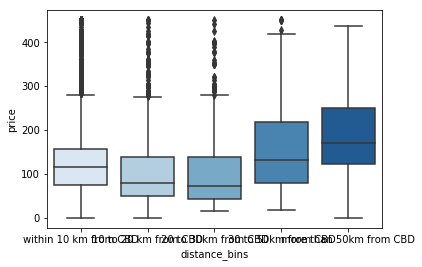

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

#this is to remove any outliers 
filtered_data = new_data[new_data['price']<=450]

sns.boxplot(x=filtered_data['distance_bins'], y=filtered_data['price'], palette='Blues')
plt.show()

In [112]:
new_data['price'].groupby(new_data['distance_bins']).describe()
#average prices 20-50km away from the CBD appears to be more expensive than listings in the city

,count,mean,std,min,25%,50%,75%,max
distance_bins,,,,,,,,
within 10 km from CBD,13726.0,151.372432,189.348268,0.0,79.0,120.0,165.0,9000.0
10 to 20 km from CBD,2411.0,130.845292,299.169715,0.0,50.0,81.0,150.0,12625.0
20 to 30km from CBD,952.0,114.108193,156.086194,15.0,44.0,74.0,140.0,3400.0
30 to 50km from CBD,863.0,202.889919,467.911101,18.0,81.0,140.0,233.5,12499.0
more than 50km from CBD,277.0,220.086643,159.738667,0.0,129.0,181.0,270.0,1499.0


In [113]:
height = new_data['price'].groupby(new_data['property_type']).mean()
bars = new_data['property_type']
y_pos = np.arange(len(bars))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

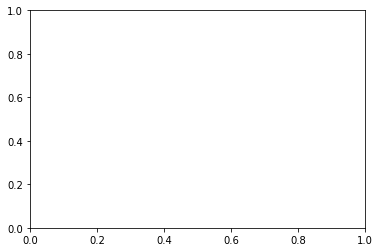

In [114]:
plt.bar(y_pos, height, align='center', alpha=0.1)
#plt.yticks(y_pos, new_data['property_type'])


<BarContainer object of 18306 artists>

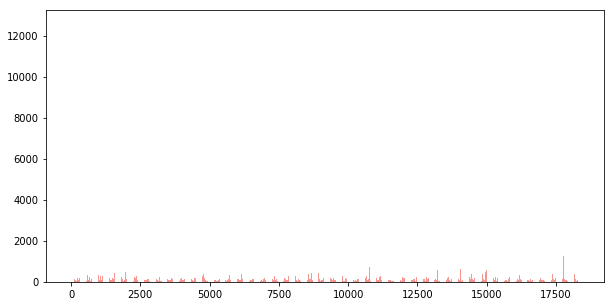

In [115]:
pos = list(range(len(new_data['price'])))
width = 0.5
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, new_data['price'], width, alpha=0.5, color='#EE3224', label=new_data['property_type'][0])

In [116]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18306 entries, 0 to 18305
Data columns (total 81 columns):
id                                  18306 non-null int64
name                                18303 non-null object
summary                             17819 non-null object
space                               13515 non-null object
description                         18103 non-null object
neighborhood_overview               11485 non-null object
notes                               9370 non-null object
transit                             12021 non-null object
access                              12301 non-null object
interaction                         11622 non-null object
house_rules                         11997 non-null object
host_id                             18306 non-null int64
host_name                           18303 non-null object
host_since                          18303 non-null datetime64[ns]
host_about                          11130 non-null object
host_response_ti

In [119]:
new_data.corr()

,id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,rank,distance_in_km,median_prices,annual_rental,daily_rental
id,1.000000,0.545068,-0.007965,0.111095,0.111095,0.005698,-0.041862,0.047724,0.011094,0.011807,...,-0.072914,0.000863,-0.001215,0.085106,0.195082,0.002091,-0.015207,-0.113179,-0.113179,-0.113179
host_id,0.545068,1.000000,-0.050175,-0.047528,-0.047528,-0.016558,0.005169,0.025297,0.006968,0.011325,...,-0.111340,-0.041517,-0.043873,-0.077495,0.137340,0.068776,0.045927,-0.129283,-0.129283,-0.129283
host_response_rate,-0.007965,-0.050175,1.000000,0.055928,0.055928,0.022742,0.006420,0.034620,-0.007875,-0.011794,...,0.172443,0.115472,0.121374,0.066307,0.154554,0.000183,0.004796,-0.027973,-0.027973,-0.027973
host_listings_count,0.111095,-0.047528,0.055928,1.000000,1.000000,0.018987,-0.071133,0.122151,0.061578,0.041158,...,-0.096546,0.011327,-0.124046,0.850339,0.111097,-0.130086,-0.134099,-0.064804,-0.064804,-0.064804
host_total_listings_count,0.111095,-0.047528,0.055928,1.000000,1.000000,0.018987,-0.071133,0.122151,0.061578,0.041158,...,-0.096546,0.011327,-0.124046,0.850339,0.111097,-0.130086,-0.134099,-0.064804,-0.064804,-0.064804
latitude,0.005698,-0.016558,0.022742,0.018987,0.018987,1.000000,-0.123898,-0.014491,-0.045107,-0.049674,...,-0.004174,-0.000790,-0.003673,0.025834,0.079466,-0.222105,-0.204336,-0.122701,-0.122701,-0.122701
longitude,-0.041862,0.005169,0.006420,-0.071133,-0.071133,-0.123898,1.000000,0.047772,0.045396,0.089639,...,0.028114,-0.002237,0.013831,-0.075847,-0.025500,0.678117,0.711886,-0.027671,-0.027671,-0.027671
accommodates,0.047724,0.025297,0.034620,0.122151,0.122151,-0.014491,0.047772,1.000000,0.474090,0.798409,...,-0.017670,0.028778,-0.050313,0.123101,0.141819,0.068619,0.065801,-0.079761,-0.079761,-0.079761
bathrooms,0.011094,0.006968,-0.007875,0.061578,0.061578,-0.045107,0.045396,0.474090,1.000000,0.541767,...,-0.030656,-0.026401,-0.040216,0.085461,-0.027723,0.082537,0.078475,0.034354,0.034354,0.034354
bedrooms,0.011807,0.011325,-0.011794,0.041158,0.041158,-0.049674,0.089639,0.798409,0.541767,1.000000,...,-0.010903,-0.000264,-0.032851,0.031049,-0.007633,0.136013,0.134554,-0.003739,-0.003739,-0.003739
